In [1]:
## Viga Contínua

from MEFVigas import Node, Bar, Beam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Propriedades do material

mod_elast = 25e9
b = 0.2
h = 0.4
area = b * h
inercia = b * h ** 3 / 12

## Propriedades gerais da viga:

q = -10e3
L = 5


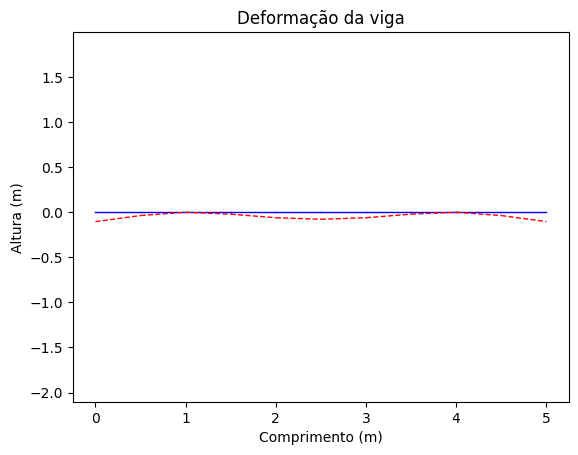

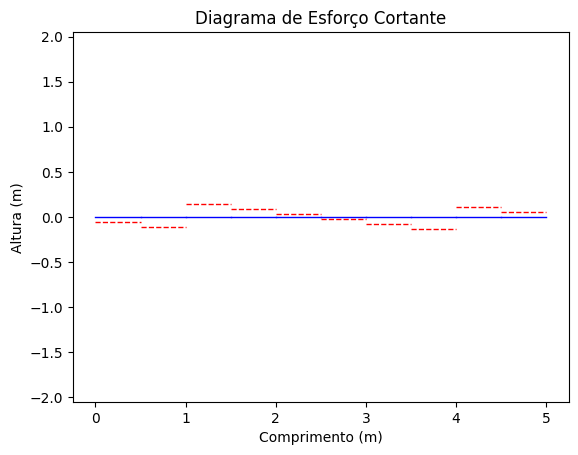

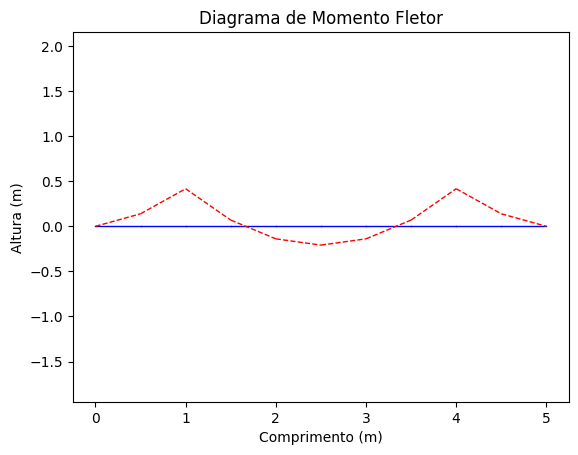

,x,y,ux,uy,ex,ey,mf
0,0.0,0.0,0.0,-0.000104,0.0,-5.555556,3.274181e-14
3,1.0,0.0,0.0,0.000000,0.0,-11.111111,-8.333333e+00
4,1.0,0.0,0.0,0.000000,0.0,13.888889,-8.333333e+00
9,2.5,0.0,0.0,-0.000078,0.0,2.777778,4.166667e+00
10,2.5,0.0,0.0,-0.000078,0.0,-2.777778,4.166667e+00
15,4.0,0.0,0.0,0.000000,0.0,-13.888889,-8.333333e+00
16,4.0,0.0,0.0,0.000000,0.0,11.111111,-8.333333e+00
19,5.0,0.0,0.0,-0.000104,0.0,5.555556,3.637979e-15


In [10]:
## Definindo os nós:

n1 = 11

x0 = np.linspace(0, 5, n1)
y0 = np.zeros(shape=(len(x0)))

## Força em cada nó:

fu = q * L / (n1 - 2)

list_nodes = []
for idx, [x, y] in enumerate(zip(x0, y0)):
    node_temp = Node(x, y, idx + 1)

    if x not in [1, 4]:
        node_temp.set_force(fx = 0, fy = fu, mz = 0)
        node_temp.set_displacement()
    
    else:
        node_temp.set_force(fx = 0, fy = 0, mz = 0)
        node_temp.set_displacement(ux = 0, uy = 0)

    list_nodes.append(node_temp)

## Definindo as barras:

list_bars = []

for idx in range(len(list_nodes) - 1):
    bar_temp = Bar(mod_elast, area, inercia, list_nodes[idx], list_nodes[idx + 1])
    list_bars.append(bar_temp)

beam1 = Beam(lista_barras = list_bars)
beam1.solver_viga()
beam1.plot_displacement()
# beam1.plot_displacement2()
# beam1.plot_axial_force()
beam1.plot_shear_force()
beam1.plot_bending_moment()
beam1.export_data(name = 'viga_cont_11')

df_1 = pd.DataFrame(beam1.dict_data)

display(df_1.loc[(df_1['x'] == 0) | (df_1['x'] == 1) | (df_1['x'] == 2.5) | (df_1['x'] == 4) | (df_1['x'] == 5)])

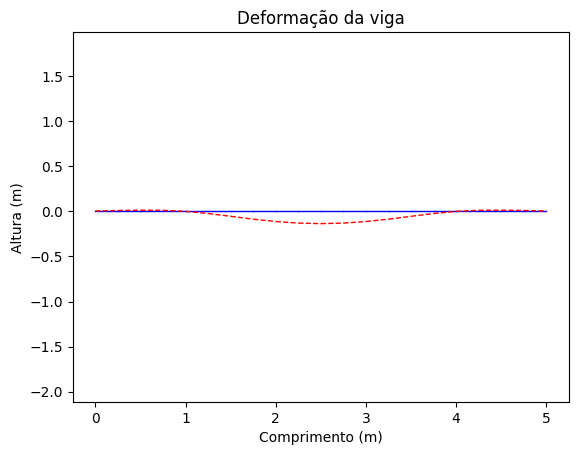

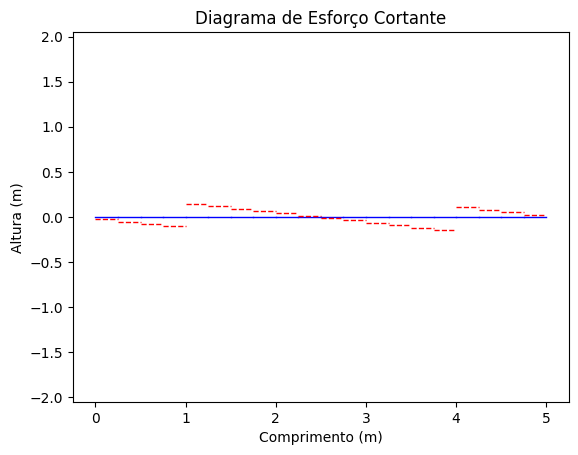

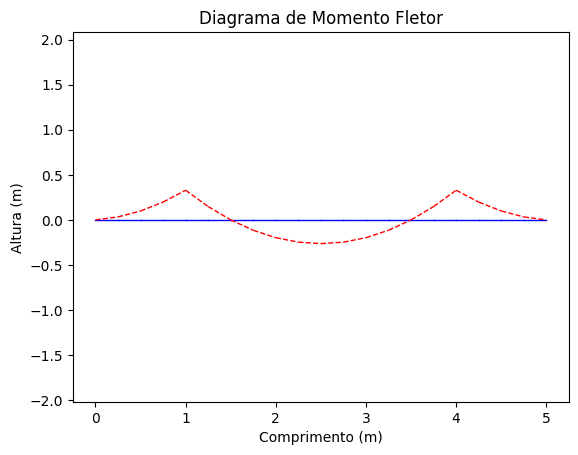

,x,y,ux,uy,ex,ey,mf
0,0.0,0.0,0.0,0.000004,0.0,-2.631579,4.592948e-14
7,1.0,0.0,0.0,0.000000,0.0,-10.526316,-6.578947e+00
8,1.0,0.0,0.0,0.000000,0.0,14.473684,-6.578947e+00
19,2.5,0.0,0.0,-0.000136,0.0,1.315789,5.263158e+00
20,2.5,0.0,0.0,-0.000136,0.0,-1.315789,5.263158e+00
31,4.0,0.0,0.0,0.000000,0.0,-14.473684,-6.578947e+00
32,4.0,0.0,0.0,0.000000,0.0,10.526316,-6.578947e+00
39,5.0,0.0,0.0,0.000004,0.0,2.631579,-3.092282e-14


In [11]:
## Definindo os nós:

n1 = 21

x0 = np.linspace(0, 5, n1)
y0 = np.zeros(shape=(len(x0)))

## Força em cada nó:

fu = q * L / (n1 - 2)

list_nodes = []
for idx, [x, y] in enumerate(zip(x0, y0)):
    node_temp = Node(x, y, idx + 1)

    if x not in [1, 4]:
        node_temp.set_force(fx = 0, fy = fu, mz = 0)
        node_temp.set_displacement()
    
    else:
        node_temp.set_force(fx = 0, fy = 0, mz = 0)
        node_temp.set_displacement(ux = 0, uy = 0)

    list_nodes.append(node_temp)

## Definindo as barras:

list_bars = []

for idx in range(len(list_nodes) - 1):
    bar_temp = Bar(mod_elast, area, inercia, list_nodes[idx], list_nodes[idx + 1])
    list_bars.append(bar_temp)

beam2 = Beam(lista_barras = list_bars)
beam2.solver_viga()
beam2.plot_displacement()
# beam2.plot_displacement2()
# beam2.plot_axial_force()
beam2.plot_shear_force()
beam2.plot_bending_moment()
beam2.export_data(name = 'viga_cont_21')

df_2 = pd.DataFrame(beam2.dict_data)

display(df_2.loc[(df_2['x'] == 0) | (df_2['x'] == 1) | (df_2['x'] == 2.5) | (df_2['x'] == 4) | (df_2['x'] == 5)])

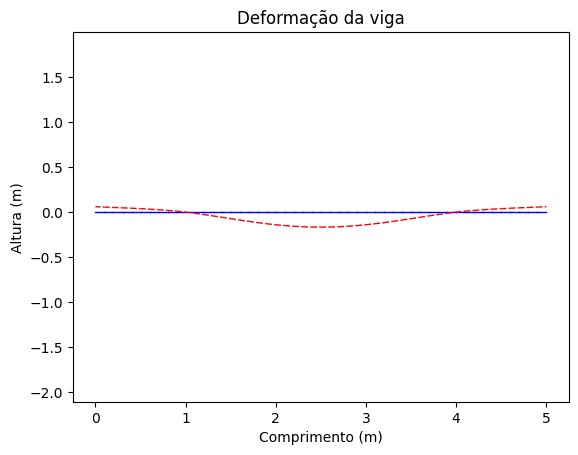

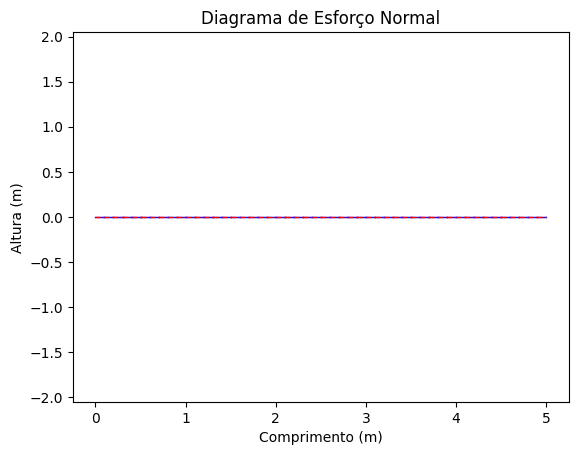

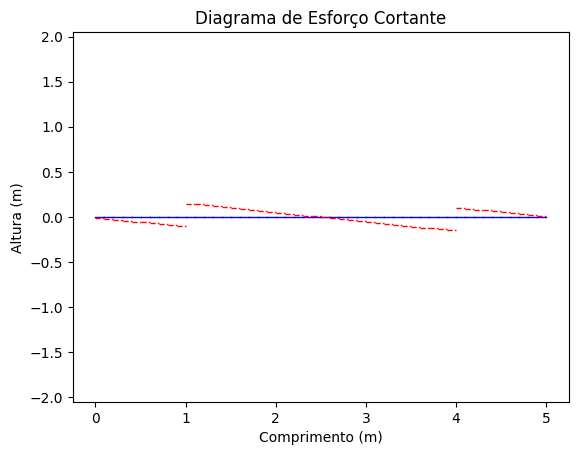

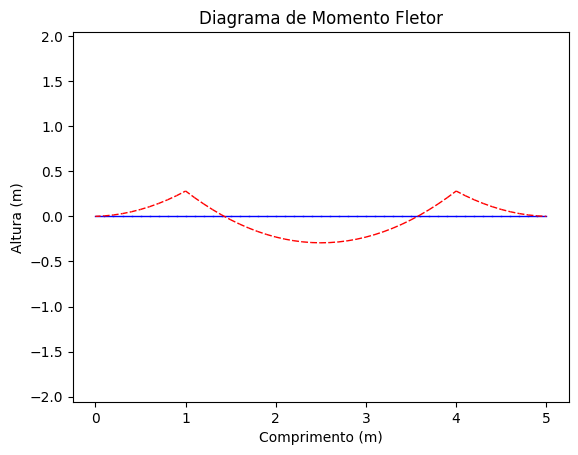

,x,y,ux,uy,ex,ey,mf
0,0.0,0.0,0.0,0.000060,0.0,-1.020408,1.167791e-12
19,1.0,0.0,0.0,0.000000,0.0,-10.204082,-5.612245e+00
20,1.0,0.0,0.0,0.000000,0.0,14.795918,-5.612245e+00
49,2.5,0.0,0.0,-0.000166,0.0,0.510204,5.867347e+00
50,2.5,0.0,0.0,-0.000166,0.0,-0.510204,5.867347e+00
79,4.0,0.0,0.0,0.000000,0.0,-14.795918,-5.612245e+00
80,4.0,0.0,0.0,0.000000,0.0,10.204082,-5.612245e+00
99,5.0,0.0,0.0,0.000060,0.0,1.020408,1.557055e-12


In [12]:
## Definindo os nós:

n3 = 51

x0 = np.linspace(0, 5, n3)
y0 = np.zeros(shape=(len(x0)))

## Força em cada nó:

fu = q * L / (n3 - 2)

list_nodes = []
for idx, [x, y] in enumerate(zip(x0, y0)):
    node_temp = Node(x, y, idx + 1)

    if x not in [1, 4]:
        node_temp.set_force(fx = 0, fy = fu, mz = 0)
        node_temp.set_displacement()
    
    else:
        node_temp.set_force(fx = 0, fy = 0, mz = 0)
        node_temp.set_displacement(ux = 0, uy = 0)

    list_nodes.append(node_temp)

## Definindo as barras:

list_bars = []

for idx in range(len(list_nodes) - 1):
    bar_temp = Bar(mod_elast, area, inercia, list_nodes[idx], list_nodes[idx + 1])
    list_bars.append(bar_temp)

beam3 = Beam(lista_barras = list_bars)
beam3.solver_viga()
beam3.plot_displacement()
# beam3.plot_displacement2()
beam3.plot_axial_force()
beam3.plot_shear_force()
beam3.plot_bending_moment()
beam3.export_data(name = 'viga_cont_51')

df_3 = pd.DataFrame(beam3.dict_data)
display(df_3.loc[(df_3['x'] == 0) | (df_3['x'] == 1) | (df_3['x'] == 2.5) | (df_3['x'] == 4) | (df_3['x'] == 5)])

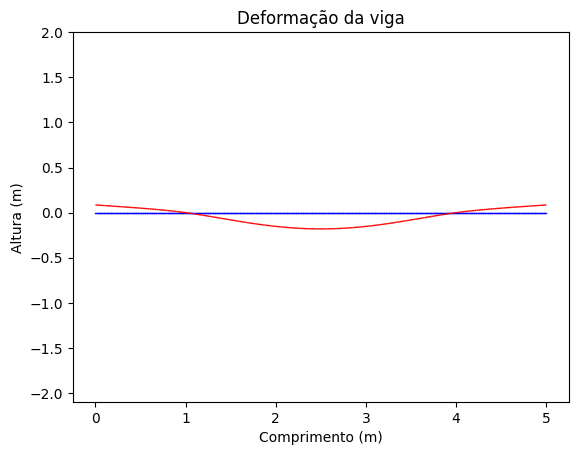

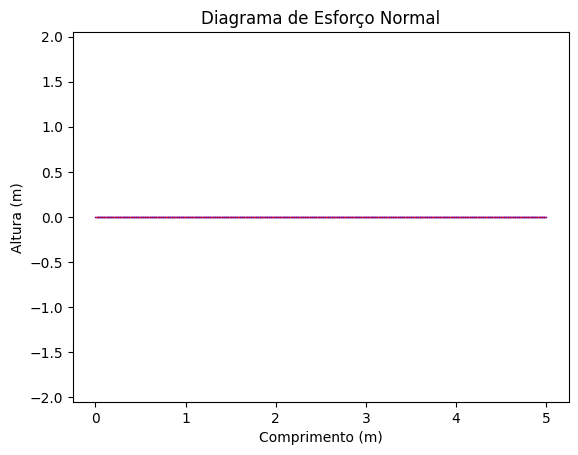

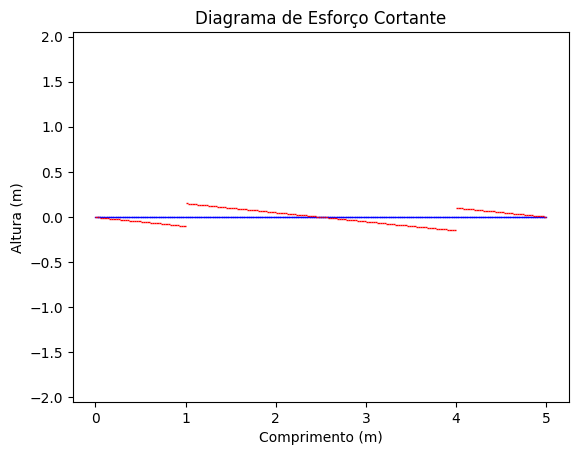

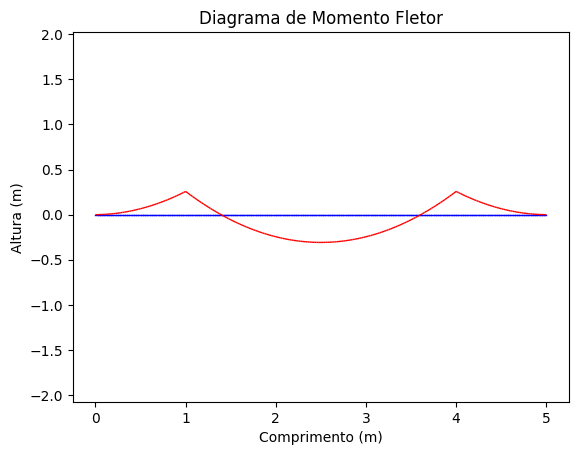

,x,y,ux,uy,ex,ey,mf
0,0.0,0.0,0.0,-0.000104,0.0,-5.555556,3.274181e-14


In [13]:
## Definindo os nós:

n4 = 201

x0 = np.linspace(0, 5, n4)
y0 = np.zeros(shape=(len(x0)))

## Força em cada nó:

fu = q * L / (n4 - 2)

list_nodes = []
for idx, [x, y] in enumerate(zip(x0, y0)):
    node_temp = Node(x, y, idx + 1)

    if x not in [1, 4]:
        node_temp.set_force(fx = 0, fy = fu, mz = 0)
        node_temp.set_displacement()
    
    else:
        node_temp.set_force(fx = 0, fy = 0, mz = 0)
        node_temp.set_displacement(ux = 0, uy = 0)

    list_nodes.append(node_temp)

## Definindo as barras:

list_bars = []

for idx in range(len(list_nodes) - 1):
    bar_temp = Bar(mod_elast, area, inercia, list_nodes[idx], list_nodes[idx + 1])
    list_bars.append(bar_temp)

beam4 = Beam(lista_barras = list_bars)
beam4.solver_viga()
beam4.plot_displacement()
# beam4.plot_displacement2()
beam4.plot_axial_force()
beam4.plot_shear_force()
beam4.plot_bending_moment()
beam4.export_data(name = 'viga_cont_201')

df_4 = pd.DataFrame(beam4.dict_data)
display(df_1.loc[(df_4['x'] == 0) | (df_4['x'] == 1) | (df_4['x'] == 2.5) | (df_4['x'] == 4) | (df_4['x'] == 5)])